In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker

In [3]:
iso_sim = pd.read_csv('bigo.csv')
iso_sim

,seq_len,iso_count,n_dons,n_accs,time
0,300,0,1,4,0.000015
1,300,0,1,6,0.000012
2,300,0,3,1,0.000011
3,300,0,4,1,0.000010
4,300,0,3,2,0.000010
...,...,...,...,...,...
1896,1200,3143083259,54,46,3402.269098
1897,1200,10550340359,52,52,15370.186402
1898,1200,10709534879,48,50,10133.434150
1899,1200,7202967391,51,53,8882.911350


<Axes: title={'center': 'iso_count'}, xlabel='seq_len'>

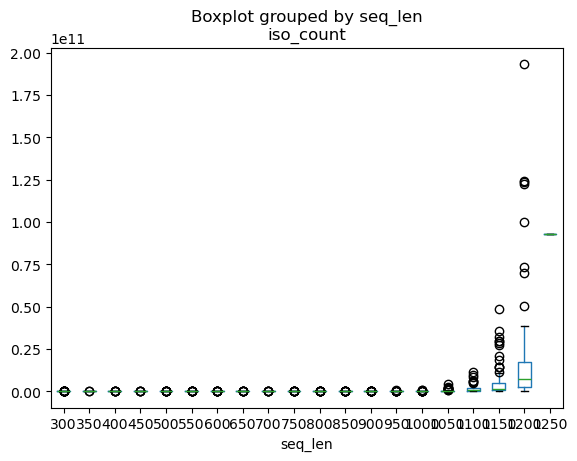

In [4]:
iso_sim.boxplot(by = 'seq_len', column = ['iso_count'], grid = False)

<Axes: title={'center': 'iso_count'}, xlabel='time'>

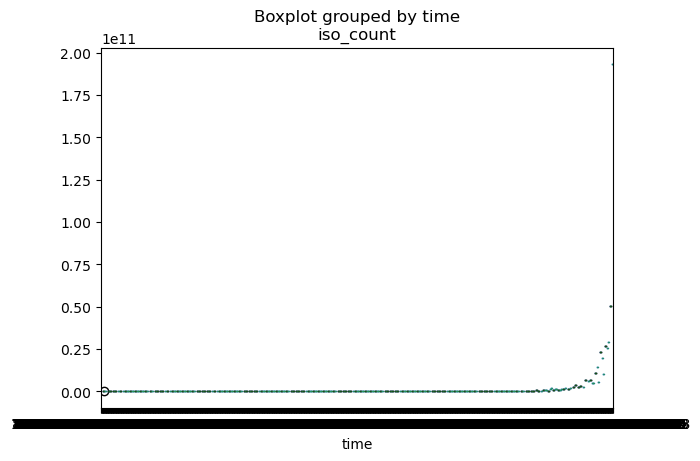

In [5]:
iso_sim.boxplot(by = 'time', column = ['iso_count'], grid = False)

In [6]:
pwm20 = pd.read_csv('sg_rnaseq_pwm_20bp.csv', header=None)
pwm20.head(10)

,0,1,2,3,4
0,smallgenes_rnaseq_relative_donpwm,0.032819,0.014615,0.014838,0.026514
1,smallgenes_rnaseq_relative_donpwm,0.019318,0.009823,0.010735,0.013278
2,smallgenes_rnaseq_relative_donpwm,0.038890,0.024539,0.018565,0.014966
3,smallgenes_rnaseq_relative_donpwm,0.143828,0.038324,0.031651,0.060549
4,smallgenes_rnaseq_relative_donpwm,0.069109,0.033438,0.244270,0.063508
5,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,2.000000,0.000000
6,smallgenes_rnaseq_relative_donpwm,0.000000,0.000000,0.000000,2.000000
7,smallgenes_rnaseq_relative_donpwm,0.364980,0.008178,0.122333,0.095131
8,smallgenes_rnaseq_relative_donpwm,0.517074,0.041288,0.053633,0.111615
9,smallgenes_rnaseq_relative_donpwm,0.075285,0.026691,0.704060,0.103733


In [7]:
pwm20_don = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_donpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_don.head(5)

,A,C,G,T
0,0.032819,0.014615,0.014838,0.026514
1,0.019318,0.009823,0.010735,0.013278
2,0.038890,0.024539,0.018565,0.014966
3,0.143828,0.038324,0.031651,0.060549
4,0.069109,0.033438,0.244270,0.063508


In [8]:
pwm20_acc = (pwm20[pwm20[0] == 'smallgenes_rnaseq_relative_accpwm']
    .drop(columns=pwm20.columns[0])
    .rename(columns={1: 'A', 2: 'C', 3: 'G', 4: 'T'}))
pwm20_acc.head(5)

,A,C,G,T
20,0.142444,0.043767,0.019292,0.100835
21,0.080952,0.033386,0.019210,0.086678
22,0.077257,0.032734,0.021609,0.100955
23,0.064045,0.027519,0.020824,0.077475
24,0.073747,0.031291,0.020163,0.086534


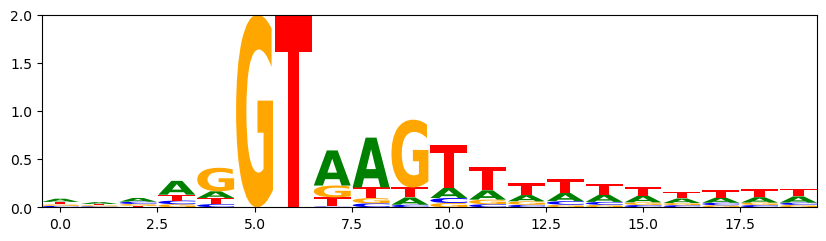

In [9]:
pwm20_don_plt = logomaker.Logo(pwm20_don, shade_below=.5, fade_below=.5)

This pwm suggests the donor site should include 2 base pairs upstream, into the exon sequence. The main donor site should also be 7 base pairs long. Suggested donor site motif would be AGGTAAGTT.

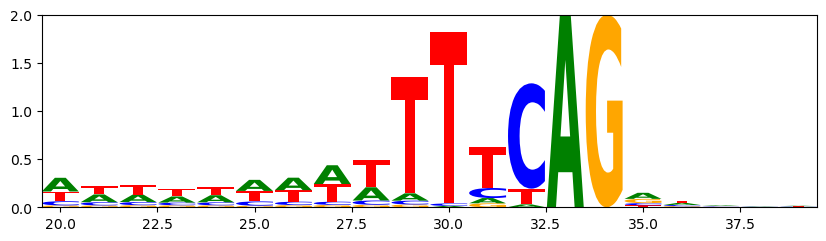

In [10]:
pwm20_acc_plt = logomaker.Logo(pwm20_acc, shade_below=.5, fade_below=.5)

This pwm suggests the acceptor site should be 8 base pairs long, with a top scoring motif being ATTTTCAG.

In [11]:
dists = pd.read_csv('apc_distances.csv')
# need to use .copy() to create new object, not a temporary object
# https://towardsdatascience.com/pandas-from-messy-to-beautiful-b03b0c32f767/
dists

,gene_id,apc_base,apc_nmd,apc_optiso,apc_optiso_nmd
0,3.600,0.499763,0.565308,0.499629,0.608436
1,1.425,0.998413,0.998413,0.998413,0.998413
2,1.282,1.000000,1.000000,1.000000,1.000000
3,2.295,0.999884,0.999884,0.749934,0.372667
4,1.180,0.667670,0.667176,0.520891,0.506345
...,...,...,...,...,...
916,1.165,0.999992,0.999992,0.696145,0.614268
917,1.416,0.800001,0.800000,0.885270,0.698463
918,2.420,0.600091,0.523281,0.059127,0.055041
919,2.580,0.950302,0.966430,0.297698,0.130910


In [12]:
dists.loc[:, 'base_to_opt_nmd'] = dists['apc_optiso_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_nmd'] = dists['apc_nmd'] - dists['apc_base']
dists.loc[:, 'base_to_opt'] = dists['apc_optiso'] - dists['apc_base']

In [13]:
dists.sort_values(by='apc_base', ascending=True)

,gene_id,apc_base,apc_nmd,apc_optiso,apc_optiso_nmd,base_to_opt_nmd,base_to_nmd,base_to_opt
681,1.700,0.005266,0.005266,0.004746,0.004746,-0.000520,-8.205011e-08,-0.000520
525,1.500,0.008454,0.008454,0.004806,0.004803,-0.003651,-1.530026e-14,-0.003648
541,1.000,0.016406,0.016414,0.001509,0.007176,-0.009229,8.619635e-06,-0.014896
779,1.750,0.068290,0.068290,0.061059,0.061059,-0.007231,-4.687942e-10,-0.007231
415,2.100,0.076505,0.063188,0.070510,0.053952,-0.022554,-1.331762e-02,-0.005995
...,...,...,...,...,...,...,...,...
54,1.519,1.000000,1.000000,0.984814,0.782020,-0.217980,0.000000e+00,-0.015186
894,1.247,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000
891,2.289,1.000000,1.000000,0.824115,0.824115,-0.175885,0.000000e+00,-0.175885
28,1.544,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000


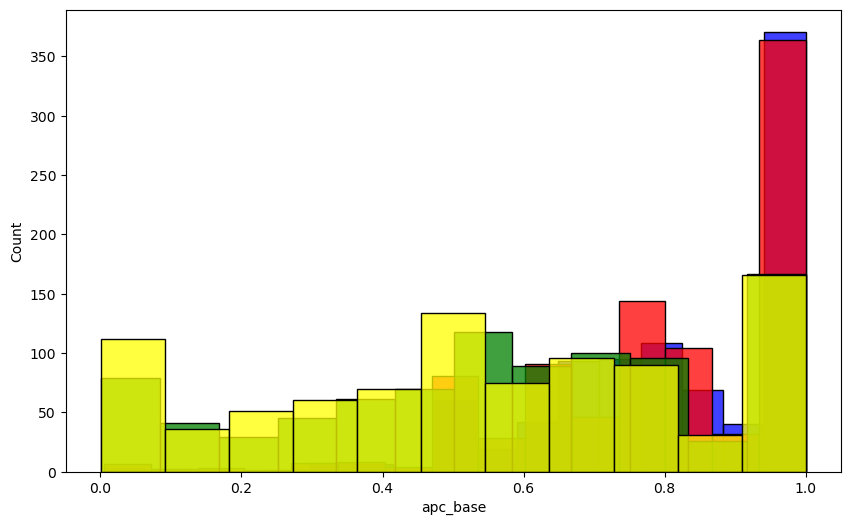

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dists, color='blue', x='apc_base')
sns.histplot(data=dists, color='red', x='apc_nmd')
sns.histplot(data=dists, color='green', x='apc_optiso')
sns.histplot(data=dists, color='yellow', x='apc_optiso_nmd')
plt.show()

In [ ]:
# check for genes with the biggest improvements in intersection